In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

import re
pd.set_option('display.max_colwidth', None)  # Show all text in each cell without truncation


In [115]:
# the directory containing all the data txt files
folder_path = 'hate-speech-dataset-master/all_files'
labels_df=pd.read_csv('hate-speech-dataset-master/annotations_metadata.csv')

In [116]:
labels_df

,file_id,user_id,subforum_id,num_contexts,label
0,12834217_1,572066,1346,0,noHate
1,12834217_2,572066,1346,0,noHate
2,12834217_3,572066,1346,0,noHate
3,12834217_4,572066,1346,0,hate
4,12834217_5,572066,1346,0,noHate
...,...,...,...,...,...
10939,33676864_5,734541,1388,0,noHate
10940,33677019_1,735154,1388,0,noHate
10941,33677019_2,735154,1388,0,noHate
10942,33677053_1,572266,1388,0,hate


In [117]:
#creating master DataFrame
DF=pd.DataFrame(columns=['post','label', 'Comment_id'])


In [118]:
#iterrating through the files
for filename in os.listdir(folder_path):
    file_id_name=filename.replace(r'.txt','') #removing the .txt
    comment_id = re.search('(\d+?(?=\_))', file_id_name, re.IGNORECASE).group(1) # the comment ID using a lookahead (no _xx)


    with open(folder_path+'/'+filename,'r') as txt:
        content=txt.read()
        content = (lambda x: x.lower() if isinstance(x, str) else x)(content) #lowercase
        content = re.sub(r'\n', ' ', content)#removing \n newline
        content = re.sub(r'[^A-Za-z0-9\'\s]',' ',content) #removing special characters
        content = re.sub(r'[\']','',content) #removing special characters
        content = re.sub(r'( {2,100})',' ',content) #removing 2 or more spaces


    #label extraction
    label = labels_df[labels_df['file_id'] == file_id_name]['label'].values[0]


    #appending new row
    DF.loc[len(DF)]=[content,label,comment_id]
    

In [143]:
DF.groupby(DF['Comment_id']).count().sort_values(by='post',ascending=False).head(3)

,post,label
Comment_id,,
14098769,24,24
30659678,22,22
30571599,19,19


the longest comment has 24 sentences

In [99]:
DF_grouped.to_csv('hate-speech-dataset-Long.csv')

In [120]:
DF.to_csv('hate-speech-dataset-master.csv')

------
# EDA: Basic Statistics:


In [145]:
DF.describe()

,post,label,Comment_id
count,10944,10944,10944
unique,10703,4,5000
top,2508,noHate,14098769
freq,21,9507,24


In [146]:
DF['label'].unique()

array(['noHate', 'idk/skip', 'relation', 'hate'], dtype=object)

In [192]:
DF.groupby(DF['label']).size()


label
hate        1196
idk/skip      73
noHate      9507
relation     168
dtype: int64

In [199]:
# Group by 'label' and count the occurrences of each label
label_counts = DF.groupby('label').size()

# Extract labels and counts
boxlabels = label_counts.index.tolist()
boxcounts = label_counts.tolist()
boxcounts

[1196, 73, 9507, 168]

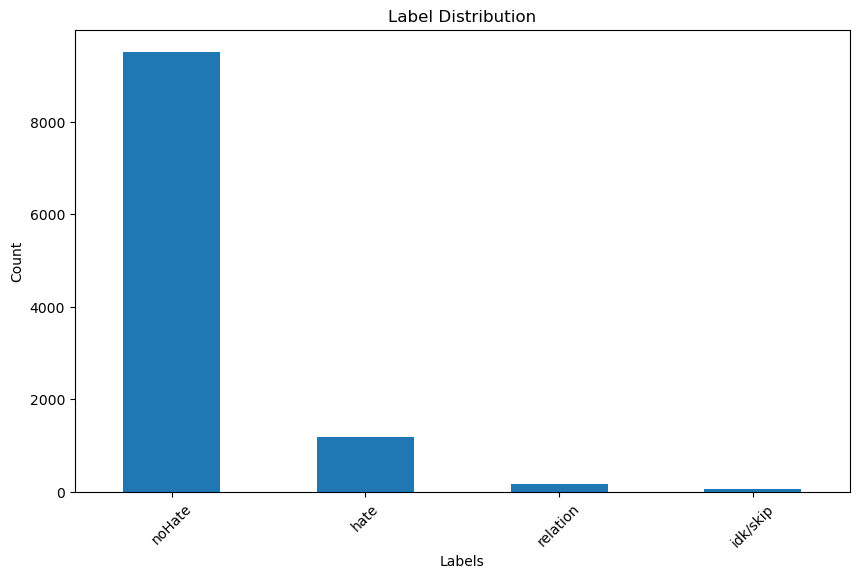

In [202]:
label_counts = DF['label'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.xticks(rotation=45)
plt.show()

In [225]:
DF[DF['label']=='idk/skip'].sample(5)

,post,label,Comment_id
10739,youtube broadcast yourself,idk/skip,30395748
8408,itt a legtobb kanadai anti rasszista aki meg nem az fel kimondani az erzelmeit mert ez sajnos a multikulturalizmus oraszaga,idk/skip,12845244
1579,youtube broadcast yourself,idk/skip,30395748
5229,https www stormfront org forum t384418 https www stormfront org forum t291185 https www stormfront org forum t113191 https www stormfront org forum t46864 https www stormfront org forum t101175 https www stormfront org forum t118865 https www stormfront org forum t142566,idk/skip,14084809
9842,youtube broadcast yourself,idk/skip,30395748


In [ ]:
# adding "youtube yourself" into the hate column due it being a reference to suicide.
DF.loc[DF['post'].str.contains('youtube broadcast yourself'),'label']='hate'

## Enhancing the dataset: improving the labels using outside hatespeech data
------
#### inital keywords test:

In [241]:
#hate speech keywords from https://www.kaggle.com/datasets/victorcallejasf/multimodal-hate-speech?select=hatespeech_keywords.txt
Hate_speech_keywords=['asian','drive','feminazi','sjw',
'WomenAgainstFeminism','blameonenotall','islam','terrorism','notallmen',
'victimcard','card','arab','terror','gamergate','jsil','racecard',
'race','card','refugeesnotwelcome','DeportallMuslims','banislam','banmuslims',
'destroyislam','norefugees','nomuslims','border','jumper','border','shyne','boojie',
'surrender','monkey','chinaman','hillbilly','whigger','white','shine','wigger','wigerette',
'bitter','clinger','conspiracy','theorist','redneck','rube','trailer','park','trash','trailer',
'trash','white','trash','yobbo','retard','retarded','spook','white','trash','trailer','trash',
'coonass','trailer','park','trash','raghead','house','coal','white','nigger','camel','fucker',
'moon','cricket','wetback','spic','bint','dyke','twat','bamboo','coon','camel','fucker','chinaman',
'limey','plastic','paddy','sideways','pussy','surrender','monkey','whigger','white','nigger','wigger',
'zionazi','camel','fucker','muzzie','soup','taker','zionazi','dyke','faggot','#DontDateSJWs','#Feminazi',
'#FemiNazi','BuildTheWall','#sorryladies','#IWouldFuckYouBut',
'Deport Them ALL','RefugeesNOTwelcome','#BanSharia','#BanIslam','#nosexist','cunt','nigga']







In [242]:
#checking if the keywords are in the dtataset and labeled incorrectly:
pattern = '|'.join(map(re.escape, Hate_speech_keywords))

DF[(DF['post'].str.contains(pattern)) & (DF['label'] == 'noHate')]


,post,label,Comment_id
11,always speak out when in a class with a brainwashing teacher because once you speak others who may feel the same way may realize they are not alone but if you say nothing then everybody will without question go along with the anti white brainwashing,noHate,30586609
21,the sooner we acknowledge eachother in local areas and band together as a unit the sooner we become a strong white nation again,noHate,14035837
37,any europeans traveling to this country must be insane i hope any whites traveling there stay safe and use good judgement at night,noHate,13379474
76,in the old days private security and armed whites would take care of this but maybe the negros are fighting smarter by taking on soft targets,noHate,30390371
81,unfortunately intelligent outliers of races generally not gifted with a high average intelligence can be very deadly,noHate,14677489
...,...,...,...
10891,we knew that these structures were built by sub saharan blacks in the same way we knew that the civilization greek and romanian built by white europeans,noHate,14672822
10896,white person before hurrying to catch the ttc out of scarborough,noHate,14022819
10904,i base this post on the fact that i live a few hundred yards from the house i was born in and have never felt the desire to suck the milk from anything other than an english nipple,noHate,14025960
10906,i guess whites will either have to start fighting back or be slowly exterminated,noHate,12868154


as we can see, an extra 1425 rows can no be added to the hate section

In [243]:
#adding 1425 rows to hate label
DF.loc[(DF['post'].str.contains(pattern)) & (DF['label'] == 'noHate'),'label']='hate'


In [ ]:
#https://www.kaggle.com/datasets/pettertornberg/stormfront

In [262]:
#Using ngrams for a second refinement of the labels:
DF_ngram=pd.read_csv('refined_ngram_dict.csv')
DF_ngram=DF_ngram.drop(columns=['prophate'])

In [264]:
DF_ngram_str=' | '.join(DF_ngram['ngram'])

In [266]:
DF[(DF['post'].str.contains(DF_ngram_str)) & (DF['label'] == 'noHate')]


,post,label,Comment_id
262,youtube x202a police brutality in jamaica caught on tape disturbing footage of police killing man cold blooded terribel x202c rlm it s just the way blacks react,noHate,13457207
326,wait until the blacks hear about black douglas or the black watch or black thursday,noHate,14673502
354,there are plenty of blacks in catholic schools or were in our area,noHate,30537360
357,the 19 year old had beaten two elderly long beach women to death and raped one with a wine bottle,noHate,13507823
395,i blame the school with all it s ethicts and multicult loving teachers i m saving as many pupils i can but i fear that s not enught,noHate,13610403
...,...,...,...
9803,ive talked to lots of punks about it and i get the same response from them that i get from blacks and minorities i want to hear a more educated opinion,noHate,31761747
9943,well i could give you another word for the female version of that part of the anatomy it begins with a c ends with a t and has the letters un in between but the language filters wo nt let me,noHate,13477287
10033,what i meant was blacks are the oldest living humans on earth,noHate,31750807
10136,youtube black savages bake puppy alive,noHate,13461530


as we can see there are an extra 75 rows mislabeled


In [267]:
DF.loc[(DF['post'].str.contains(DF_ngram_str)) & (DF['label'] == 'noHate'),'label']='hate'


In [283]:
DF.loc[(DF['label']=='noHate') & (DF['post'].str.contains('jews')),'label']='hate'

In [290]:
DF.loc[(DF['label']=='noHate') & (DF['post'].str.contains('fag')),'label']='hate'

In [415]:
DF.loc[(DF['label']=='noHate') & (DF['post'].str.contains('nazi ')),'label']='hate'

In [329]:
DF.loc[(DF['label']=='noHate') & (DF['post'].str.contains('aryan')),'label']='hate'

In [411]:
DF.loc[(DF['label']=='noHate') & (DF['post'].str.contains('14')),'label']='hate' #14 is a dogwhistle

In [377]:
#more dog whistles
dog_whistles="""(?i)
88| \sH\s| 14| 2083| 9%| 1488| 6| 311| KKK| 5| 23| 28| B&H| Blood| 
Honour| BM| C18| Combat| BNSM| ITP| Third| KKK| N9S| 9th| ZOG| NSM|
Socialist| Movement| RVF| BFG| Bound| Glory| FFF| JOG| Occupied| KIGY
| LOSG| League| NS| ORION| Race| Nation| RAC| RAHOWA| Racial| Holy War|
WPWW| SWP| Supreme| White| Power
blood libel |cabal |clannish |conspiracy |theory 
|cosmopolitan |elite |cowardice |creatures |loyalty |(((echo)))|globalist |Goyim|greed |Holocough |Holocaust |Illuminati
 |capitalist  |communist |Jew down |Jewish figures |Jewish |
lightning |Jewish  |Judas |silver |Khazars |kosher |New World order|Jews |poisoning |Protocols|Zion |QAnon |Rothschild |
Satan |scapegoat |silencing |slavery |slave |trade |smirking |merchant |Soros |Zionism 
|racism |Zio |Zionist |Occupied |reich
"""

In [379]:
DF.loc[(DF['post'].str.contains(dog_whistles)) & (DF['label'] == 'noHate'),'label']='hate'


/var/folders/1x/qzsml84s3_91xx343khzjmhw0000gn/T/ipykernel_34032/794850983.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  DF.loc[(DF['post'].str.contains(dog_whistles)) & (DF['label'] == 'noHate'),'label']='hate'


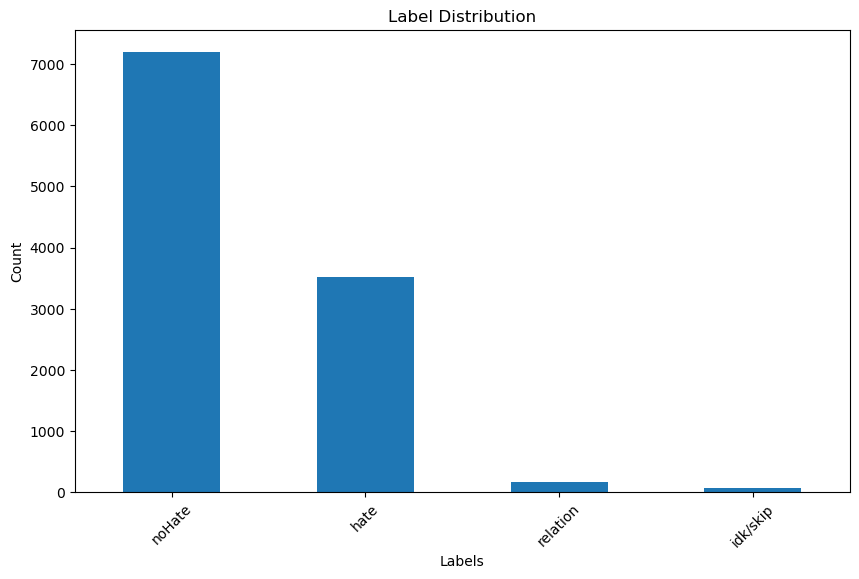

In [380]:
label_counts = DF['label'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.xticks(rotation=45)
plt.show()

### Cleaning The data:

In [430]:
#removing short posts: less than 3 words
DF['wordcount']=DF['post'].apply(lambda x: len(str.split(x)))
DF

,post,label,Comment_id,wordcount
0,it s like that at most public boards,noHate,13458115,8
1,i wonder if one of the victims opened the door to their apartment for some reason,noHate,13367480,16
2,some people believe the jack o lantern also represents the ancient celtic warrior s tradition of taking the heads of their enemies as trophies,noHate,30422449,24
3,ready go,noHate,14651837,2
4,thanks,noHate,30527903,1
...,...,...,...,...
10939,also it s so sad to see so much pre made crap in their grocery buys,noHate,13472256,16
10940,cf,noHate,14417873,1
10941,sorry that you were unaware,noHate,30597853,5
10942,my grandmother has red hair,noHate,30626265,5


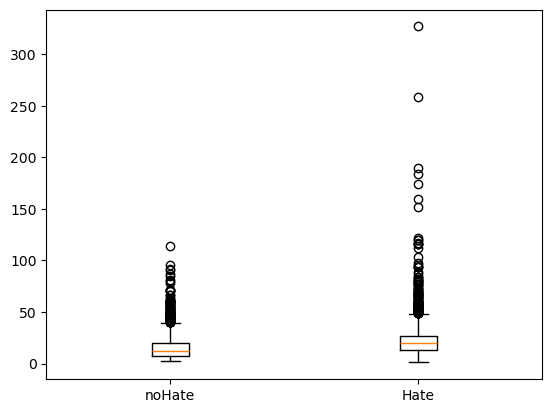

In [464]:
plt.boxplot([DF[DF['label']=='noHate']['wordcount'],DF[DF['label']=='hate']['wordcount']],labels=['noHate','Hate'])
plt.show()

In [463]:
#dropping all rows less than 3 words
DF = DF.drop(DF.loc[(DF['wordcount'] <= 1) & (DF['label'] == 'noHate')].index)


In [469]:
import spacy 
nlp=spacy.load('en_core_web_md')#using the md model because it has word embeddings



In [470]:
#loading our dataframe into the spacy doc object

def docFeeder(text):
    doc=nlp(text)
    #inb4 process..

    return doc

docs=[]#spacy doc object of same len as our dataset. containing the text=>doc object of each row
for text in DF['post']:
    doc=docFeeder(text)
    docs.append(doc)
    


In [ ]:
#index reset to match doc 
DF=DF.reset_index(drop=True)


In [488]:
DF.sample(5)

,post,label,Comment_id,wordcount
528,prince of bel air moeisha etc,noHate,12959694,6
5529,you picked a poor time to start such a thread seeing as how just this week the ira were categorically cleared of all paramilitary terrorist illegal activity,hate,13860252,27
6775,keep your eyes open at all times for fallen powerlines,noHate,30395929,10
7924,emily tubb 33 of southaven who is in the english department at east high school was indicted last week for alleged possession with intent to distribute adderall alprazolam and heroin,noHate,13125529,30
5084,is that sign like passop danger,noHate,14097593,6


In [491]:
for token in docs[5084]:
    print(token.lemma_)
    

be
that
sign
like
passop
danger


#### removing stopwords:

In [494]:
DF_copy=DF.copy()

In [495]:
# creating a new row of lemmatized/non stop word posts
row_lemma_stop=[]
for i in range(len(docs)):
    lemmatized_tokens = []

    for token in docs[i]:
        if not token.is_stop:
            lemmatized_tokens.append(token.lemma_)
    row_lemma_stop.append(' '.join(lemmatized_tokens))

row_lemma_stop[0]

's like public board'

In [503]:
DF['Normalized']=row_lemma_stop

In [504]:
DF

,post,label,Comment_id,wordcount,Normalized
0,it s like that at most public boards,noHate,13458115,8,s like public board
1,i wonder if one of the victims opened the door to their apartment for some reason,noHate,13367480,16,wonder victim open door apartment reason
2,some people believe the jack o lantern also represents the ancient celtic warrior s tradition of taking the heads of their enemies as trophies,noHate,30422449,24,people believe jack o lantern represent ancient celtic warrior s tradition take head enemy trophy
3,ready go,noHate,14651837,2,ready
4,com watch v krdycxpb4fs and then the entire myron fagan video youtube,hate,12870229,12,com watch v krdycxpb4fs entire myron fagan video youtube
...,...,...,...,...,...
10598,i hardly have any slav in me but my great great grandma was serbian so i have a little slavic in me,noHate,30542001,22,hardly slav great great grandma serbian little slavic
10599,also it s so sad to see so much pre made crap in their grocery buys,noHate,13472256,16,s sad pre crap grocery buy
10600,sorry that you were unaware,noHate,30597853,5,sorry unaware
10601,my grandmother has red hair,noHate,30626265,5,grandmother red hair


In [508]:
DF['Normalized']=DF['Normalized'].replace('(\b\w\b)','',regex=True) 
DF['Normalized']=DF['Normalized'].replace('  ',' ',regex=True) 
DF

,post,label,Comment_id,wordcount,Normalized
0,it s like that at most public boards,noHate,13458115,8,like public board
1,i wonder if one of the victims opened the door to their apartment for some reason,noHate,13367480,16,wonder victim open door apartment reason
2,some people believe the jack o lantern also represents the ancient celtic warrior s tradition of taking the heads of their enemies as trophies,noHate,30422449,24,people believe jack lantern represent ancient celtic warrior tradition take head enemy trophy
3,ready go,noHate,14651837,2,ready
4,com watch v krdycxpb4fs and then the entire myron fagan video youtube,hate,12870229,12,com watch krdycxpb4fs entire myron fagan video youtube
...,...,...,...,...,...
10598,i hardly have any slav in me but my great great grandma was serbian so i have a little slavic in me,noHate,30542001,22,hardly slav great great grandma serbian little slavic
10599,also it s so sad to see so much pre made crap in their grocery buys,noHate,13472256,16,sad pre crap grocery buy
10600,sorry that you were unaware,noHate,30597853,5,sorry unaware
10601,my grandmother has red hair,noHate,30626265,5,grandmother red hair


## WordCloud:

In [122]:
from wordcloud import WordCloud

In [420]:
text_datahate=' '.join(DF[DF['label']=='hate']['post'])
text_datanohate=' '.join(DF[DF['label']=='noHate']['post'])

In [141]:
#word counts for each category:

hateWordCount=len(str.split(text_datahate))
No_hateWordCount=len(str.split(text_datanohate))

print('Hate posts word count: ',hateWordCount)
print('NoHate posts word count: ',No_hateWordCount)


Hate posts word count:  26661
NoHate posts word count:  150685


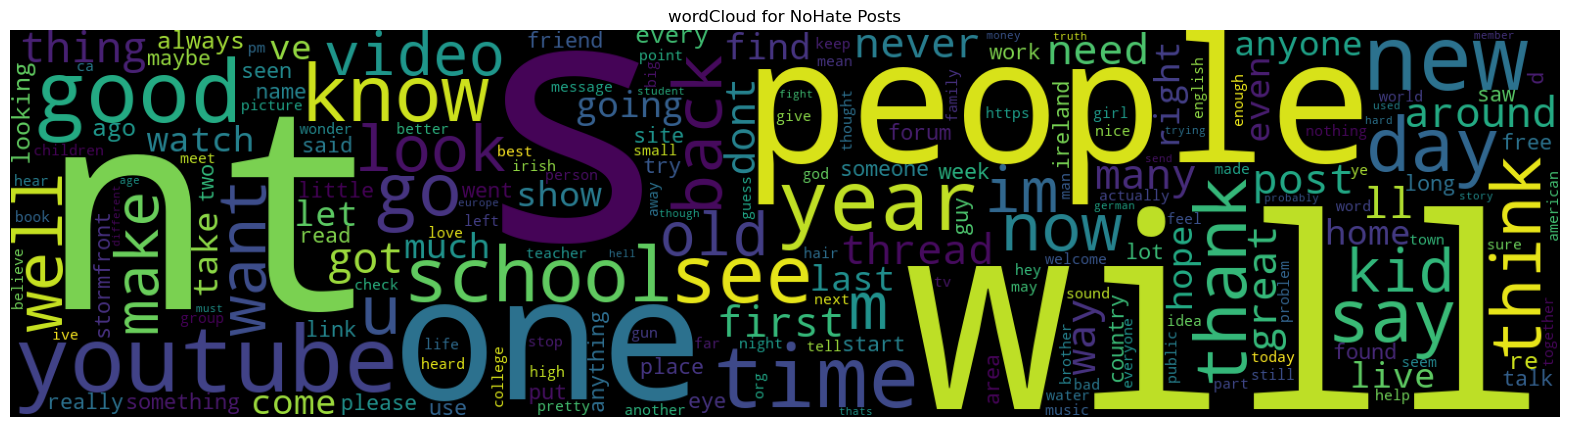

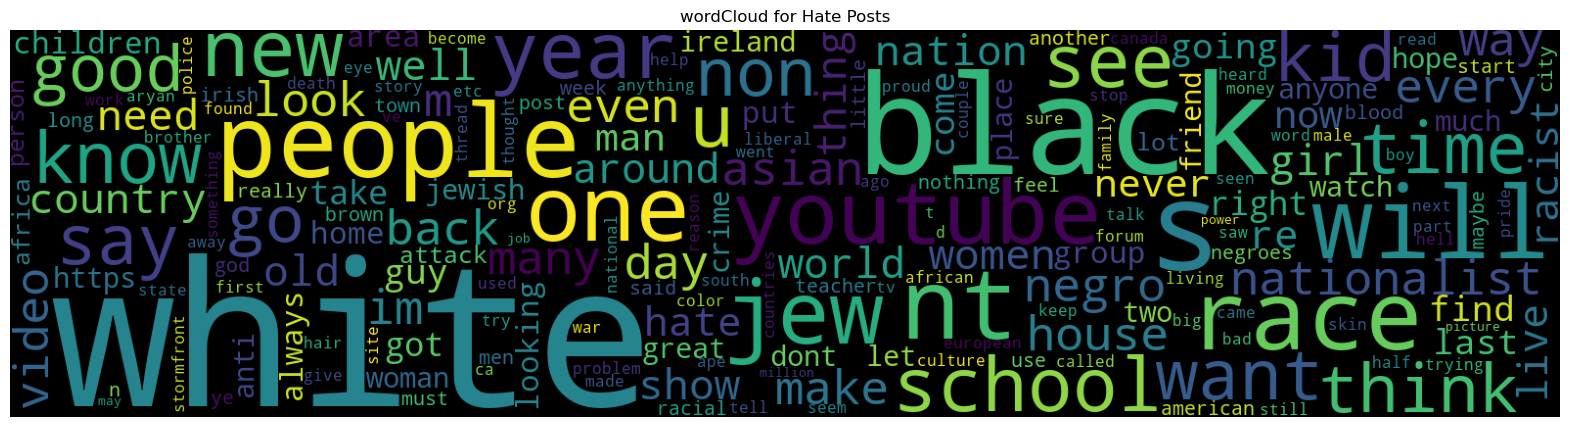

In [421]:
wordcloud = WordCloud(collocations=False,width=1584, height=396, background_color='Black').generate(text_datanohate)

# Display the word cloud

plt.figure(figsize=(20, 10))
plt.title('wordCloud for NoHate Posts')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.imshow(wordcloud)
plt.savefig('wordcloudNoHate.png', facecolor='k', bbox_inches='tight')


wordcloud = WordCloud(collocations=False,width=1584, height=396, background_color='Black').generate(text_datahate)

# Display the word cloud

plt.figure(figsize=(20, 10))
plt.title('wordCloud for Hate Posts')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.imshow(wordcloud)
plt.savefig('wordcloudNoHate.png', facecolor='k', bbox_inches='tight')



### WordCloud for Normalized text

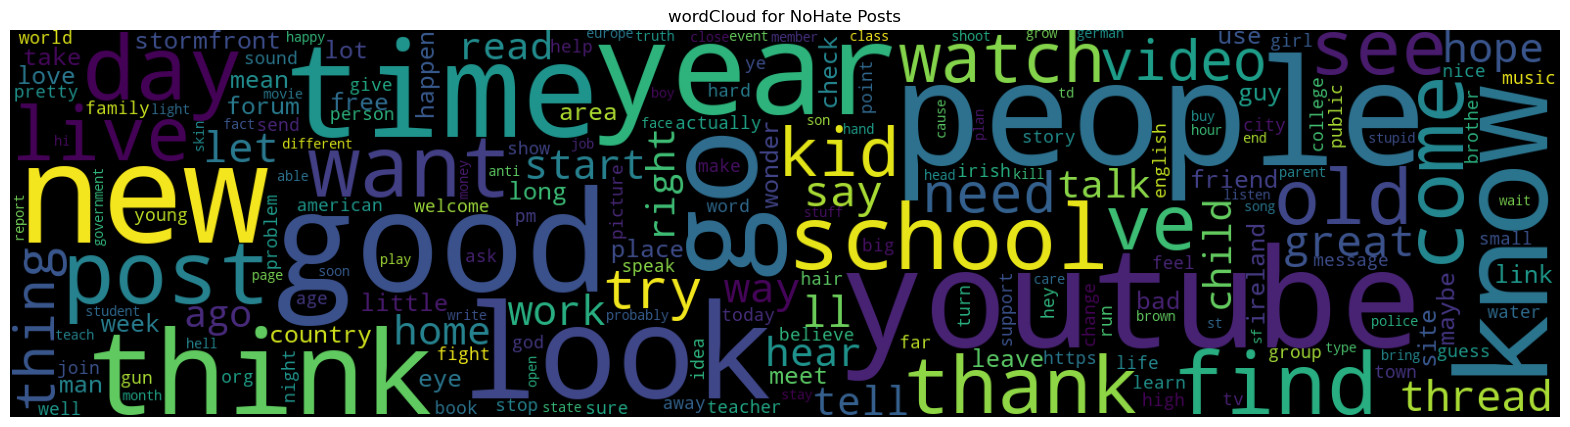

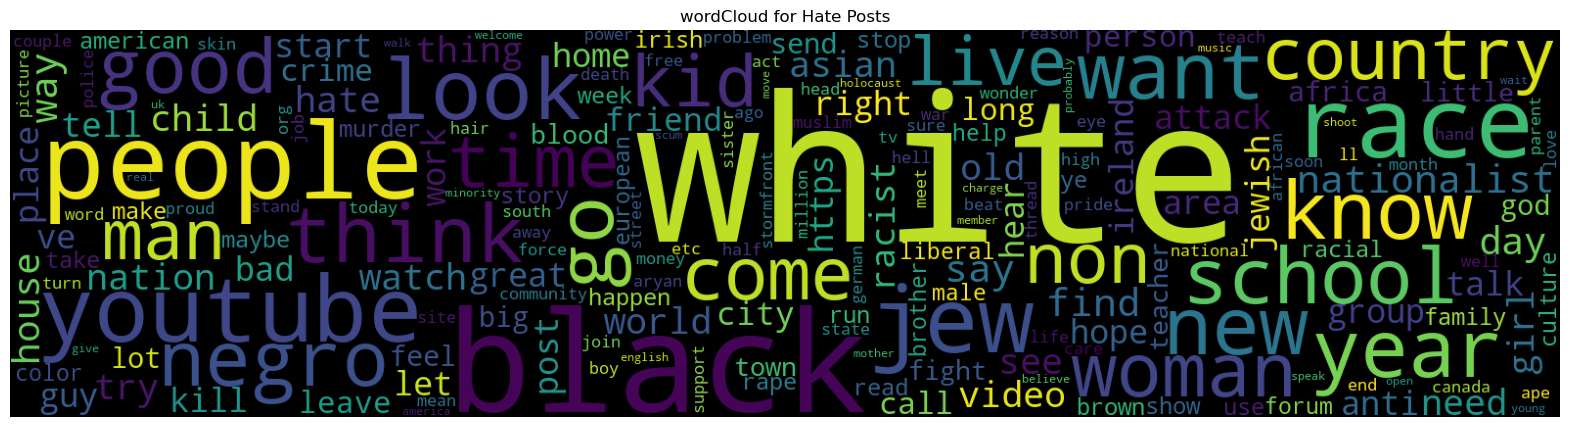

In [509]:
text_datahate=' '.join(DF[DF['label']=='hate']['Normalized'])
text_datanohate=' '.join(DF[DF['label']=='noHate']['Normalized'])
wordcloud = WordCloud(collocations=False,width=1584, height=396, background_color='Black').generate(text_datanohate)

# Display the word cloud

plt.figure(figsize=(20, 10))
plt.title('wordCloud for NoHate Posts')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.imshow(wordcloud)
plt.savefig('wordcloudNoHate_norm.png', facecolor='k', bbox_inches='tight')


wordcloud = WordCloud(collocations=False,width=1584, height=396, background_color='Black').generate(text_datahate)

# Display the word cloud

plt.figure(figsize=(20, 10))
plt.title('wordCloud for Hate Posts')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.imshow(wordcloud)
plt.savefig('wordcloudNoHate_norm.png', facecolor='k', bbox_inches='tight')



### BoxPlot for Normalized Text

In [ ]:
DF['wordcount_norm']=DF['Normalized'].apply(lambda x: len(str.split(x)))



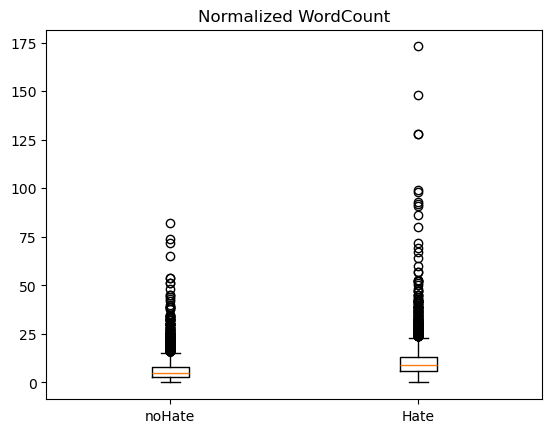

In [514]:
plt.boxplot([DF[DF['label']=='noHate']['wordcount_norm'],DF[DF['label']=='hate']['wordcount_norm']],labels=['noHate','Hate'])
plt.title('Normalized WordCount')
plt.show()

In [515]:
DF.to_csv('EDA_normed.csv')

In [517]:
DF_parquet=DF[['Normalized','label']]

In [518]:
DF_parquet

,Normalized,label
0,like public board,noHate
1,wonder victim open door apartment reason,noHate
2,people believe jack lantern represent ancient celtic warrior tradition take head enemy trophy,noHate
3,ready,noHate
4,com watch krdycxpb4fs entire myron fagan video youtube,hate
...,...,...
10598,hardly slav great great grandma serbian little slavic,noHate
10599,sad pre crap grocery buy,noHate
10600,sorry unaware,noHate
10601,grandmother red hair,noHate


In [520]:
DF_parquet.to_parquet('DF_norm.parquet', engine='fastparquet')


In [521]:
DF_parquet.to_csv('DF_norm.csv')
